# Concepts in Network Theory

Networks: Network representations are ubiquitous for things like social 
networks, the world wide web, transportation and power grids. 

In biology it naturally projects to dynamics of molecular interaction inside cells 
(metabolic or protein-protein networks), neuroscience and and ecological networks. In this submodule we will 
focus on the first two. 

The study of the brain using network theory is a fairly new field in neuroscience known as **brain connectivity**. Nothing about the idea is new, as it dates back at last 100 years, but only with advances in imaging technologies have we started to gain access into what it looks like. Some neuroscientists [who?] have been quoted saying that if we had perfect resolution of an individual's connectome, this would (in theory) allow full access into that person's memories, knowledge, personal traits etc. By comparison, with the imaging technologies today available, a single node encompass millions of neurons.

## [image of brain network and of protein-network]

In [339]:
## go through a few topological metrics
## go through random graph
## go through small-worlds 
## show img of regular -> sw -> random

## See github course for inspiration https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience

## Network representation

Networks are most naturally visualized as a set of points (nodes) connected by lines (edges).

<img
src="assets/graph_random_circle.png"
width=300
/>

This data is typically stored as a list of edges, for the figure above we would have G = {A,B}, {B,A}, {B,C}.
Another equivalent form is the adjacency matrix, which is less intuitive, but mathematically appealing (color code: black=1; white=0).


<img
src="assets/matrix_example.png"
width=500
/>

In [3]:
import numpy as np

####  Exercise 1. construct the matrix (numpy array), A representing the following graph. 

<img
src="assets/ex0_1.png"
width=200
style="float: left"
/>

Hint: we write the connection from row to column (e.g. the link from 1 to 3 should be at the 1st row and 3rd column). Note this convention is not always consistent.

In [4]:
# %load solutions/ex0_1.py
A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

`NetworkX` is a python library specialized for working with graphs. They provide a class `networkx.Graph` which stores a network as a list of edges. We can convert freely between the different representations using `networkx`.

In [20]:
import networkx as nx
G = nx.from_numpy_array(A)

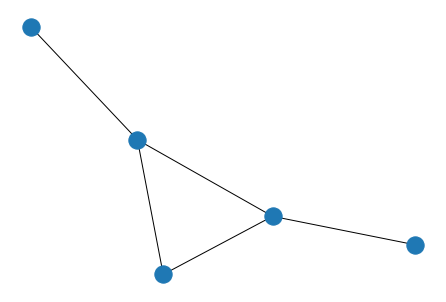

In [21]:
nx.draw(G)

## Directedness and weightedness

We have two questions of network properties to consider when making a model:
- is the edges directed or undirected? 
- are the edges continuous or binary?

For instance, the WWW is directed, but a social acquaintance does not follow a particular direction. We can use the `nx.DiGraph` class to force it to create a directed graph.

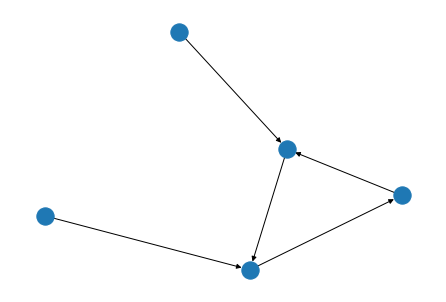

In [28]:
G_dir = nx.from_numpy_array(A, create_using=nx.DiGraph)
nx.draw(G_dir)

And we can just as easily transform it back into a numpy array:

In [33]:
M = nx.to_numpy_array(G_dir)
M == A #they are the same as expected

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## Graph metrics
Graph metrics are numbers that quanitfy certain properties of a network (global metrics) or about specific nodes in the network (local metrics). Because it is hard to infer things about a network simply by looking at it, these numbers capture the essence of a network, and lets us test specific hypotheses about network structure.

<img src="assets/rubinov_sporns_2010_neuroimage.png"
     alt="graph metrics"
     width=1000
     style="float: left; margin-right: 10px;" />

##### A bunch of other graph metrics exist that quantify importance of a node within a network.
These are collectively termed "centrality", but all quantify slightly different things.

- degree centrality
- betweenness centrality
- closeness centrality

##### Other metrics quantify overall network structure
- Density
- small-worldness
- modularity

The various metrics are tempting to use, but it is crucial to interpret them according to the network you happen to study.

# An example of network theory in action
Consider the world wide web (WWW), one of the more familiar networks of everyday life. When performing a search with your search engine of choice, it has to sort the results based on some kind of importance metric. The old method of doing this was to base it upon page *content*, and rate it accordingly. This method yielded very poor results. An ingenious milestone was, paradoxically, to dismiss the site content, and *only* look at its **topological** position in the network.

### PageRank
We use the seemingly circular argument: a page (node) is important if other important pages point (link) to it. We start with an initial distribution of "importance" between the nodes, then at each iteration the node redistributes its own importance determined by their outward links (imagine a surfer who at each time step has a certain probability of moving to a new page). This process is allowed to repeat, and will at some point reach steady state. The below image has already reached steady state.


<img src="assets/PageRanks-Example_345Kai_no(c).jpg"
     alt="graph metrics"
     width=500
     style="float: left; margin-right: 10px;" />
(image credit to 345Kai wikipedia)

We will go on to reproduce the above figure.

In [374]:
np.set_printoptions(2)

In [379]:
# define the edges. Note that A is set to link to all other pages
#(a mathematical necessity because it has no outward links)

M = np.array([
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### Exercise 2. normalize the edges such that the sum of the columns equal to 1.

Hint: first compute the column sums (yielding a vector), then divide each column by that vector (broadcasting).

#### a)

In [387]:
# %load solutions/ex0_2a.py
col_sums = np.sum(M, axis=0)
col_sums

array([0.09, 1.  , 1.  , 0.5 , 0.33, 0.5 , 0.5 , 0.5 , 0.5 , 1.  , 1.  ])

#### b)

In [388]:
# %load solutions/ex0_2b.py
M = M / col_sums[np.newaxis, :] #newaxis ensures the broadcasting is correct
M

array([[0.09, 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 1.  , 0.5 , 0.33, 0.5 , 0.5 , 0.5 , 0.5 , 0.  , 0.  ],
       [0.09, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.5 , 0.5 , 0.5 , 0.5 , 1.  , 1.  ],
       [0.09, 0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

#### c)

In [399]:
# %load solutions/ex0_2c.py
np.sum(M, axis=0)
#or
np.isclose(np.sum(M, axis=0), 1.)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [216]:
# from https://en.wikipedia.org/wiki/PageRank#Simplified_algorithm
import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

In [217]:
pr = pagerank(M, 100, d=.85)

#### Exercise 3: 
Compute the pagerank and confirm it matches with the figure shown above (within a reasonable margin of error).

In [400]:
# %load solutions/ex0_3.py

pr = pagerank(M)
print(pr*100)
np.sum(pr)

[[ 3.28]
 [38.44]
 [34.29]
 [ 3.91]
 [ 8.09]
 [ 3.91]
 [ 1.62]
 [ 1.62]
 [ 1.62]
 [ 1.62]
 [ 1.62]]


1.0000000000000009

In [401]:
#this will export the solutions to the exercises
!python ../nb2sln.py Concepts_in_Network_Theory.ipynb

out_fn =  ex0_1.py
wrote file  .tmpdir_Concepts_in_Network_Theoryipynb/ex0_1.py
out_fn =  ex0_2a.py
wrote file  .tmpdir_Concepts_in_Network_Theoryipynb/ex0_2a.py
out_fn =  ex0_2b.py
wrote file  .tmpdir_Concepts_in_Network_Theoryipynb/ex0_2b.py
out_fn =  ex0_2c.py
wrote file  .tmpdir_Concepts_in_Network_Theoryipynb/ex0_2c.py
out_fn =  ex0_3.py
wrote file  .tmpdir_Concepts_in_Network_Theoryipynb/ex0_3.py
